# 簡易的Grid World迷宮之初始策略評估計算

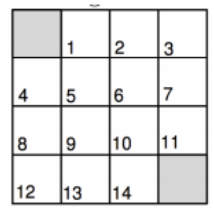

In [1]:
# 從IPython.display模組匯入Image類別，用來在Jupyter Notebook中顯示圖片
from IPython.display import Image

# 載入並顯示位於當前目錄中的grid_world.png圖片
Image('./grid_world.png')

In [2]:
# 匯入numpy套件，用於數值計算與陣列處理
import numpy as np

# 匯入random模組，用於隨機數生成
import random

In [3]:
# 定義網格大小為4x4(表示一個4行4列的格子世界)
gridSize = 4

# 每走一步的獎勵為-1(代表移動會消耗資源或付出代價)
rewardValue = -1

# 遊戲的終止狀態(終點位置)，當agent移動到這些格子時，遊戲結束
# [0, 0]表示左上角格子
# [gridSize - 1, gridSize - 1]表示右下角格子，這裡是[3, 3]
terminationStates = [[0, 0], [gridSize - 1, gridSize - 1]]

# 行動空間：定義agent可以採取的4種動作(上下左右)，用向量表示位移方向
actions = [[-1, 0],   # 上：x減1，y不變
           [1, 0],    # 下：x加1，y不變
           [0, 1],    # 右：x不變，y加1
           [0, -1]]   # 左：x不變，y減1

In [4]:
# 定義一個函式，用來計算在特定狀態執行某個動作後的結果(新位置與獎勵)
def actionValue(initialPosition, action):
    
    # 如果目前位置是終點狀態之一(不再移動)
    if initialPosition in terminationStates:
        finalPosition = initialPosition   # 不移動，保持在原地
        reward = 0                        # 在終點，獎勵為0(代表已達成目標，沒有額外懲罰)

    else:
        # 若不是終點，則根據動作更新位置
        # initialPosition和action都是座標[x, y]，使用numpy相加得到新座標
        finalPosition = np.array(initialPosition) + np.array(action)

        # 每次移動的獎勵預設為-1(懲罰)
        reward = rewardValue

    # 若移動後的位置超出邊界，則退回原來的位置
    if -1 in finalPosition or gridSize in finalPosition:
        finalPosition = initialPosition  # 移動無效，退回原地
        reward = rewardValue             # 移動失敗，仍給予懲罰(-1)

    # 傳回移動後的位置與該次行動的獎勵
    return finalPosition, reward

In [5]:
# 策略評估函式(Policy Evaluation)
# numIterations：訓練迭代次數(表示對整張value map更新多少次)
# gamma：折扣因子，影響未來獎勵的權重
# valueMap：目前的狀態值函數(以二維陣列表示每個位置的價值)
# 在這裡我們假設策略是均勻的，也就是每個動作的機率都是1/4

def policy_evaluation(numIterations, gamma, valueMap):
    # 建立valueMap的副本，用來暫存新計算的值
    valueMap1 = np.copy(valueMap)

    # 執行多次遍歷來更新每個狀態的價值(根據固定策略)
    for i in range(numIterations):
        # 對所有狀態進行遍歷更新
        for state in states:     # states是所有非終點格子的位置清單(需事先定義)
            weightedRewards = 0  # 初始化加權平均報酬(用來計算該狀態的值)

            # 對每一個可能動作進行計算(四個方向)
            for action in actions:
                # 取得執行動作後的新位置與該動作的獎勵
                finalPosition, reward = actionValue(state, action)

                # 套用貝爾曼期望方程式：加總所有可能動作的期望報酬(每個動作的機率是1/4)
                weightedRewards += 1/4 * (reward + gamma * valueMap[finalPosition[0], finalPosition[1]])

            # 將加總後的期望值更新到新value map
            valueMap1[state[0], state[1]] = weightedRewards

        # 將本輪計算得到的valueMap1複製到valueMap，作為下一輪遍歷的基礎
        # 使用np.copy()是為了避免valueMap與valueMap1共用記憶體，防止互相影響
        valueMap = np.copy(valueMap1)

    # 印出最終的狀態值函數value map(或可改為每次印)
    print(valueMap, '\n')

## 訓練3週期

In [6]:
# 初始化狀態值函數(Value Function)，所有狀態的初始值設為0
valueMap = np.zeros((gridSize, gridSize))  

# 定義所有可能的狀態(x, y)，即網格世界中的每一個位置
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

# 執行策略評估(Policy Evaluation)
# 參數說明：
# 600 → 訓練的迭代次數(episodes/iterations)
# 1 → 折扣因子γ(discount factor)，1代表未來獎勵與當前同等重要
# valueMap → 狀態值函數，用來存放每個狀態的估計價值

policy_evaluation(600, 1, valueMap)  

[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]] 

